In [48]:
import tensorflow as tf
print(tf.__version__)

2.11.0


Load Data

In [49]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

##Normarize the data
#By dividing by 255 it will make input size between 0-1
x_train, x_test,  = x_train / 255, x_test / 255
print("x_train size: ", x_train.shape)
print("x_test size: ", x_test.shape)

x_train size:  (60000, 28, 28)
x_test size:  (10000, 28, 28)


Build model

In [50]:
from keras.api._v2.keras import activations
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

Compile Model

In [51]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Train model

In [52]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3036 - accuracy: 0.9107 - val_loss: 0.1435 - val_accuracy: 0.9571
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1447 - accuracy: 0.9576 - val_loss: 0.1022 - val_accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1098 - accuracy: 0.9667 - val_loss: 0.0880 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0897 - accuracy: 0.9723 - val_loss: 0.0784 - val_accuracy: 0.9754
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0776 - accuracy: 0.9754 - val_loss: 0.0760 - val_accuracy: 0.9759
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0670 - accuracy: 0.9787 - val_loss: 0.0708 - val_accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0584 - accuracy: 0.9812 - val_loss: 0.0713 - val_acc

Plot Loss per Iteration and Accuracy per Iteration

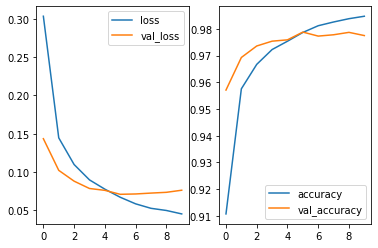

In [53]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Evaluate Model

In [54]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0762 - accuracy: 0.9775
[0.07617723196744919, 0.9775000214576721]


Plor Confusion Metrix


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 970    0    2    1    1    1    3    0    1    1]
 [   0 1120    4    0    0    1    6    0    4    0]
 [   5    0 1013    3    1    0    3    2    5    0]
 [   0    0    8  963    0   26    0    2    6    5]
 [   1    0    2    0  952    0    9    1    1   16]
 [   2    0    0    0    0  884    4    0    1    1]
 [   4    2    0    1    1    3  946    0    1    0]
 [   1    7   17    2    0    0    0  990    4    7]
 [   4    0    3    2    2    7    6    2  946    2]
 [   0    2    0    4    6    3    1    1    1  991]]


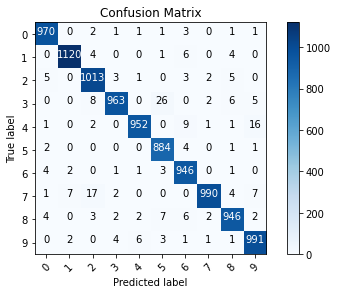

In [60]:
from sklearn.metrics import confusion_matrix 
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion Matrix', 
                          cmap=plt.cm.Blues):
    """
    This funciton pronts out confusion matrix
    Normalization can be applied by setting 'nomalize=True
    """

    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion metrix")

    else:
      print('Confusion matrix, without normalization')
    
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i,j], fmt),
               horizontalalignment="center",
               color="white" if cm[i,j] > thresh else "black")
      
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Show some misclassified example

Text(0.5, 1.0, 'True label: 3 PredictedL 5')

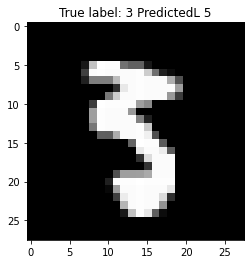

In [66]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s PredictedL %s" % (y_test[i], p_test[i]))